# Week 08 Homework

Based on Chapter 13: Multilevel models

In [217]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

from scipy import stats
from scipy.special import expit as logistic

#suppress Arviz warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


## Q1 

> Revisit the Reed frog survival data, data(reedfrogs), and add the predation
and size treatment variables to the varying intercepts model. Consider models with
either predictor alone, both predictors, as well as a model including their interaction.
What do you infer about the causal influence of these predictor variables? Also focus
on the inferred variation across tanks (the  across tanks). Explain why it changes
as it does across models with different predictors included.

### Data preparation

In [218]:
d = pd.read_csv(r"..\resources\Rethinking_2\Data\reedfrogs.csv", sep=",") # use DOS backslashes and raw text
d.head()

,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9


Create an index for tanks and count.

In [219]:
tid = range(len(d))
n_tanks = d.shape[0]

### Inital model (tanks only)

In [220]:
with pm.Model() as q1_a:
    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tid])
    S = pm.Binomial("S", d["density"], p, observed=d["surv"])
    
    trace1_a = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, a_bar, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.


In [221]:
with q1_a:
    res = az.summary(trace1_a, round_to = 2)
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,1.35,0.27,0.85,1.83,0.01,0.00,2812.88,1685.79,1.00
a[0],2.11,0.87,0.54,3.81,0.01,0.01,5015.92,1439.11,1.00
a[1],3.08,1.10,1.01,5.07,0.02,0.02,3734.44,1342.11,1.00
a[2],1.01,0.65,-0.11,2.24,0.01,0.01,3799.51,1395.28,1.00
a[3],3.05,1.11,1.26,5.36,0.02,0.02,2973.11,1460.71,1.00
a[4],2.15,0.91,0.36,3.67,0.02,0.01,3353.83,1239.62,1.00
a[5],2.14,0.83,0.68,3.76,0.01,0.01,3677.96,1257.35,1.00
a[6],3.09,1.08,1.08,5.12,0.02,0.02,3086.39,1308.86,1.00
a[7],2.16,0.89,0.40,3.67,0.02,0.01,3543.91,1404.00,1.00
a[8],-0.19,0.62,-1.40,0.92,0.01,0.02,4244.34,1235.48,1.00


### Data prep for covariates

Change predator to codes (0 = none, 1 = predator)

In [14]:
d["pred"] = pd.Categorical(d["pred"])

In [15]:
d["pred"]= d["pred"].cat.codes

Change size in the same way: big = 0, small = 1

In [16]:
d["size"] = pd.Categorical(d["size"])


In [20]:
d["size"] = d["size"].cat.codes

### b) Size only

In [32]:
with pm.Model() as q1_b:
    size = pm.Normal("size", 0, 1, shape=2)
    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tid] + size[d["size"]])
    S = pm.Binomial("S", d["density"], p, observed=d["surv"])
    diff = pm.Deterministic("diff", size[0] - size[1])
    
    trace1_b = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, a_bar, sigma, size]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 21 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [33]:
with q1_b:
    res = az.summary(trace1_b, round_to = 2, var_names=["a_bar", "sigma", "size", "diff"])
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,1.08,0.72,-0.25,2.44,0.06,0.05,126.05,247.78,1.01
sigma,1.62,0.21,1.24,2.04,0.01,0.00,1491.67,1448.87,1.00
size[0],0.08,0.74,-1.23,1.47,0.07,0.05,122.00,237.76,1.01
size[1],0.46,0.74,-0.85,1.82,0.06,0.05,130.91,245.18,1.01
diff,-0.38,0.49,-1.36,0.51,0.02,0.01,685.89,799.99,1.00


#### Intperpretation

Size has little effect

### c) Predator only

In [34]:
with pm.Model() as q1_c:
    pred = pm.Normal("pred", 0, 1, shape=2)
    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tid] + pred[d["pred"]])
    S = pm.Binomial("S", d["density"], p, observed=d["surv"])
    diff = pm.Deterministic("diff", pred[0] - pred[1])
    
    trace1_c = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, a_bar, sigma, pred]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 21 seconds.
The acceptance probability does not match the target. It is 0.9051781949086126, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


In [35]:
with q1_c:
    res = az.summary(trace1_c, round_to = 2, var_names=["a_bar", "sigma", "pred", "diff"])
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.97,0.74,-0.43,2.30,0.11,0.08,42.79,134.79,1.02
sigma,0.82,0.15,0.54,1.09,0.01,0.00,658.25,671.75,1.00
pred[0],1.64,0.73,0.27,2.96,0.11,0.08,46.29,146.77,1.02
pred[1],-0.90,0.74,-2.30,0.48,0.11,0.08,43.20,115.44,1.02
diff,2.54,0.30,1.94,3.06,0.01,0.01,1435.22,1430.07,1.00


In [39]:
logistic(trace1_c["pred"][0]).mean() - logistic(trace1_c["pred"][1]).mean()

-0.04057153749232001

#### Interpretation

Presence of predators has a large effect.  Note that sigma goes down&mdash;there is less (unexplained) heterogeneity between tanks.

#### Same model with dummy instead of index variable

In [42]:
with pm.Model() as q1_c2:
    bPred = pm.Normal("bPred", 0, 1)
    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tid] + bPred * d["pred"])
    S = pm.Binomial("S", d["density"], p, observed=d["surv"])
    
    trace1_c2 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, a_bar, sigma, bPred]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 17 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [44]:
with q1_c2:
    res = az.summary(trace1_c2, round_to = 2, var_names=["a_bar", "sigma", "bPred"])
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,2.50,0.23,2.04,2.90,0.01,0.01,312.40,696.14,1.00
sigma,0.82,0.15,0.56,1.10,0.01,0.00,610.12,914.32,1.00
bPred,-2.37,0.30,-2.92,-1.82,0.02,0.01,261.38,549.41,1.01


### d) Both main effects

In [45]:
with pm.Model() as q1_d:
    pred = pm.Normal("pred", 0, 1, shape=2)
    size = pm.Normal("size", 0, 1, shape=2)
    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tid] + pred[d["pred"]] + size[d["size"]])
    S = pm.Binomial("S", d["density"], p, observed=d["surv"])
    diff_pred = pm.Deterministic("diff_pred", pred[0] - pred[1])
    diff_size = pm.Deterministic("diff_size", size[0] - size[1])
    
    trace1_d = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, a_bar, sigma, size, pred]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [50]:
with q1_d:
    res = az.summary(trace1_d, round_to = 2, var_names=["a_bar", "sigma", "diff_size", "diff_pred"])
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
pred[0],1.49,0.65,0.24,2.64,0.06,0.04,114.43,262.56,1.00
pred[1],-1.08,0.64,-2.31,0.11,0.06,0.04,118.40,261.74,1.00
size[0],-0.12,0.66,-1.31,1.13,0.06,0.04,112.00,227.34,1.01
size[1],0.37,0.65,-0.82,1.64,0.06,0.04,109.24,347.76,1.01
a_bar,1.01,0.80,-0.54,2.35,0.14,0.10,34.29,96.93,1.02
a[0],0.99,1.01,-0.95,2.82,0.13,0.09,61.96,237.08,1.01
a[1],1.43,1.05,-0.43,3.51,0.14,0.10,54.47,178.20,1.01
a[2],0.29,0.98,-1.65,2.02,0.13,0.09,56.17,213.80,1.00
a[3],1.39,1.03,-0.42,3.38,0.14,0.10,55.28,166.77,1.01
a[4],0.87,1.05,-1.07,2.82,0.13,0.10,61.34,211.05,1.00


#### Interpretation

Size still does not matter.

### e) With interactions

In [52]:
with pm.Model() as q1_e:
    bPred = pm.Normal("bPred", 0, 1)
    bSize = pm.Normal("bSize", 0, 1)
    bPS = pm.Normal("bPS", 0, 1)
    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tid] + bPred * d["pred"] + bSize * d["size"] + bPS *  d["pred"] *  d["size"] )
    S = pm.Binomial("S", d["density"], p, observed=d["surv"])
    
    trace1_e = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, a_bar, sigma, bPS, bSize, bPred]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [51]:
with q1_e:
    res = az.summary(trace1_e, round_to = 2)
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bPred,-2.57,0.36,-3.25,-1.88,0.02,0.02,245.26,544.52,1.01
bSize,0.30,0.39,-0.44,1.00,0.02,0.02,326.19,968.29,1.00
bPS,0.38,0.47,-0.53,1.24,0.02,0.01,572.78,1314.65,1.00
a_bar,2.33,0.29,1.80,2.89,0.02,0.02,192.94,509.16,1.01
a[0],2.33,0.62,1.20,3.50,0.02,0.01,1764.89,933.22,1.00
a[1],2.74,0.67,1.52,4.04,0.02,0.01,1776.93,1524.95,1.00
a[2],1.66,0.60,0.50,2.79,0.02,0.01,1323.53,1326.42,1.00
a[3],2.74,0.69,1.46,4.04,0.02,0.01,1682.45,1291.35,1.00
a[4],2.25,0.68,1.00,3.53,0.02,0.02,844.12,1139.41,1.00
a[5],2.26,0.69,1.02,3.56,0.02,0.02,970.71,1180.19,1.00


#### Interpretation

Interaction does not seem like much.

In terms of tanks, they have much less impact in the fuller model (except in full interaction model?)

### Comparisons

In [225]:
az.compare({"q1_a": trace1_a, "q1_b": trace1_b, "q1_c": trace1_c, "q1_d": trace1_d,  "q1_e": trace1_e},
           method='BB-pseudo-BMA', scale="deviance")

C:\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\stats\stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
C:\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\stats\stats.py:692: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\stats\stats.py:692: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the mar

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
q1_e,0,209.067729,23.754902,0.000000,0.526918,7.821745,0.000000,True,deviance
q1_d,1,212.072344,25.109666,3.004614,0.137544,7.623278,2.142996,True,deviance
q1_c,2,214.195057,26.771902,5.127328,0.107224,11.686581,4.166276,True,deviance
q1_a,3,214.707431,28.405050,5.639702,0.145194,9.996469,7.065349,True,deviance
q1_b,4,216.453013,29.086304,7.385283,0.083119,10.377906,7.341793,True,deviance


## Q2

> Fit both (1) a traditional fixed-effects model that uses an index variable for district and
(2) a multilevel model with varying intercepts for district. Plot the predicted proportions
of women in each district using contraception, for both the fixed-effects
model and the varying-effects model. That is, make a plot in which district ID is on
the horizontal axis and expected proportion using contraception is on the vertical.
Make one plot for each model, or layer them on the same plot, as you prefer. How
do the models disagree? Can you explain the pattern of disagreement? In particular,
can you explain the most extreme cases of disagreement, both why they happen
where they do and why the models reach different inferences?

### Data prep

In [83]:
d2 = pd.read_csv("Data/bangladesh.csv", sep=";")
d2.head()

,woman,district,use.contraception,living.children,age.centered,urban
0,1,1,0,4,18.4400,1
1,2,1,0,1,-5.5599,1
2,3,1,0,3,1.4400,1
3,4,1,0,4,8.4400,1
4,5,1,0,1,-13.5590,1


Converting to a categorical variable assigns and code, which is contiguous.

In [84]:
d2["district"] = pd.Categorical(d2["district"])

In [103]:
d2["district_idx"] = d2["district"].cat.codes

In [104]:
d2["district_idx"] 

0        0
1        0
2        0
3        0
4        0
        ..
1929    59
1930    59
1931    59
1932    59
1933    59
Name: district_idx, Length: 1934, dtype: int8

### Fixed effects/intercept model

In [105]:
n_dist = len(d2["district"].cat.categories)
n_dist

60

In [106]:
with pm.Model() as q2_a:
    a = pm.Normal("a", shape = n_dist)
    p = pm.math.invlogit(a[d2["district_idx"]])
    use_rate = pm.Binomial("use_rate", 1, p, observed=d2["use.contraception"])
    
    trace2_a = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 27 seconds.


In [107]:
with q2_a:
    res = az.summary(trace2_a, round_to = 2)
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],-1.03,0.22,-1.45,-0.61,0.00,0.00,6174.97,1146.18,1.00
a[1],-0.52,0.44,-1.33,0.28,0.01,0.01,5202.75,1272.38,1.01
a[2],0.70,0.84,-0.86,2.28,0.01,0.02,4190.01,1331.55,1.00
a[3],-0.00,0.34,-0.69,0.58,0.01,0.01,4263.50,1379.57,1.00
a[4],-0.53,0.33,-1.13,0.09,0.00,0.00,4900.11,1485.66,1.00
a[5],-0.84,0.27,-1.36,-0.37,0.00,0.00,5209.14,1425.15,1.00
a[6],-0.78,0.47,-1.61,0.11,0.01,0.01,4450.16,1559.12,1.00
a[7],-0.45,0.32,-1.11,0.11,0.00,0.00,5284.73,1557.38,1.01
a[8],-0.71,0.41,-1.46,0.07,0.01,0.01,4709.95,1201.72,1.00
a[9],-1.52,0.59,-2.69,-0.45,0.01,0.01,5510.41,1555.12,1.00


### Mulitlevel model

In [133]:
with pm.Model() as q2_b:
    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape = n_dist)
    p = pm.math.invlogit(a[d2["district_idx"]])
    use_rate = pm.Binomial("use_rate", 1, p, observed=d2["use.contraception"])
    
    trace2_b = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, a_bar, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 36 seconds.


In [134]:
with q2_b:
    res = az.summary(trace2_b, round_to = 2)
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,-0.54,0.09,-0.71,-0.39,0.00,0.00,1665.28,1628.36,1.0
a[0],-0.99,0.20,-1.33,-0.60,0.00,0.00,2686.52,1429.74,1.0
a[1],-0.59,0.34,-1.22,0.05,0.01,0.00,3991.88,1342.32,1.0
a[2],-0.23,0.50,-1.20,0.65,0.01,0.01,2952.72,1299.28,1.0
a[3],-0.18,0.30,-0.74,0.37,0.01,0.01,2934.97,1544.72,1.0
...,...,...,...,...,...,...,...,...,...
a[56],-0.29,0.30,-0.92,0.23,0.00,0.01,3965.18,1152.78,1.0
a[57],-1.00,0.42,-1.80,-0.24,0.01,0.01,3123.96,1467.07,1.0
a[58],-1.00,0.32,-1.65,-0.45,0.01,0.00,3529.97,1475.93,1.0
a[59],-1.05,0.29,-1.63,-0.52,0.01,0.00,3163.96,1364.71,1.0


In [181]:
x = d2["district_idx"].astype("category").cat.categories
x

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

This took some mucking around to get subscripted values of `a`.  Convert to inference data, which is an xarray, and extract from the xarray.

In [183]:
idata_a = az.from_pymc3(trace2_a)
idata_b = az.from_pymc3(trace2_b)

In [184]:
idata_b["posterior"]["a"].mean(dim=["chain", "draw"])

<xarray.DataArray 'a' (a_dim_0: 60)>
array([-0.9919181 , -0.58883539, -0.22993958, -0.18397987, -0.56476088,
       -0.81107921, -0.75586512, -0.50919996, -0.71268781, -1.12859548,
       -1.53892378, -0.60843472, -0.41805219,  0.39462698, -0.55618187,
       -0.12229342, -0.75326567, -0.63368073, -0.50823536, -0.47653404,
       -0.48740944, -0.96409057, -0.75676683, -1.16891476, -0.27481002,
       -0.51526595, -1.18284331, -0.96454332, -0.8003531 , -0.13776929,
       -0.29991003, -0.97279787, -0.41374858,  0.2700496 , -0.13292394,
       -0.58291088, -0.22191903, -0.70768264, -0.20340474, -0.26003017,
       -0.19872911, -0.24235071, -0.04194646, -0.9601117 , -0.65300243,
       -0.00726047, -0.35481937, -0.07136587, -0.8560633 , -0.3078434 ,
       -0.2828286 , -0.29516035, -0.42057475, -0.77520863,  0.1005202 ,
       -1.06823518, -0.29373201, -1.00119516, -0.99808898, -1.04846686])
Coordinates:
  * a_dim_0  (a_dim_0) int32 0 1 2 3 4 5 6 7 8 9 ... 51 52 53 54 55 56 57 58 59

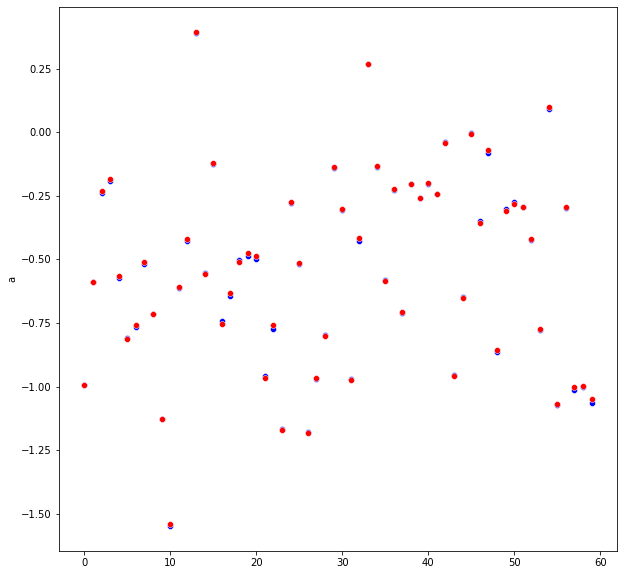

In [230]:
__, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=x, y=idata_a["posterior"]["a"].mean(dim=["chain", "draw"]), ax=ax, color="blue")
sns.scatterplot(x=x, y=idata_b["posterior"]["a"].mean(dim=["chain", "draw"]), ax=ax, color="red")
plt.show()

### Plot as probabilties

Convert a_bar to a probability.

Extract the xarray from idatas, convert to probabilities, then calculate mean in graph.

In [227]:
a_mean = logistic(trace2_b["a_bar"]).mean()
a_mean

0.3693332526134369

In [211]:
a_matrix_a = logistic(idata_a["posterior"]["a"])
a_matrix_b = logistic(idata_b["posterior"]["a"])

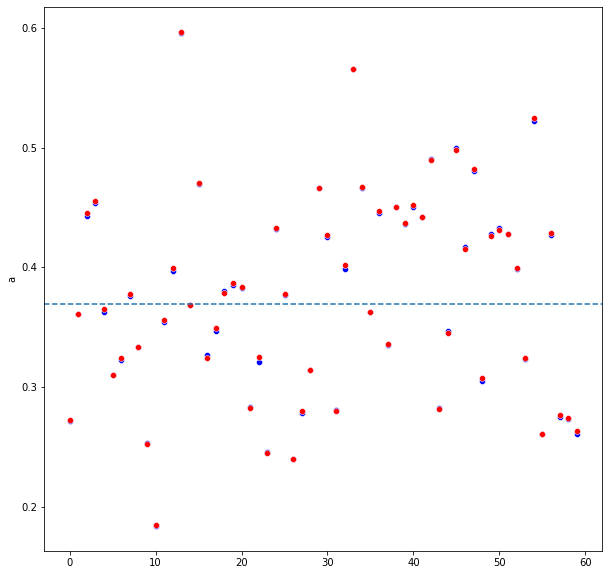

In [228]:
__, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=x, y=a_matrix_a.mean(dim=["chain", "draw"]), ax=ax, color="blue")
sns.scatterplot(x=x, y=a_matrix_b.mean(dim=["chain", "draw"]), ax=ax, color="red")
ax.axhline(y=a_mean, linestyle="--")
plt.show()

### Interpretation

Shrinkage towards mean for multilevel.

## Q3

> Return to the Trolley data, data(Trolley), from Chapter 12. Define and fit a
varying intercepts model for these data. By this I mean to add an intercept parameter
for the individual to the linear model. Cluster the varying intercepts on individual
participants, as indicated by the unique values in the id variable. Include action,
intention, and contact as before. Compare the varying intercepts model and a
model that ignores individuals, using both WAIC/LOO and posterior predictions.
What is the impact of individual variation in these data?

In [187]:
d3 = pd.read_csv("Data/Trolley.csv",
               sep=";")
d3.head()

,case,response,order,id,age,male,edu,action,intention,contact,story,action2
0,cfaqu,4,2,96;434,14,0,Middle School,0,0,1,aqu,1
1,cfbur,3,31,96;434,14,0,Middle School,0,0,1,bur,1
2,cfrub,4,16,96;434,14,0,Middle School,0,0,1,rub,1
3,cibox,3,32,96;434,14,0,Middle School,0,1,1,box,1
4,cibur,3,4,96;434,14,0,Middle School,0,1,1,bur,1


In [190]:
d3["edu_new"] = pd.Categorical(
    d.edu.values,
    categories=[
        "Elementary School",
        "Middle School",
        "Some High School",
        "High School Graduate",
        "Some College",
        "Bachelor's Degree",
        "Master's Degree",
        "Graduate Degree",
    ],
    ordered=True,
)

In [191]:
d3["edu_new"] = d3["edu_new"].cat.codes

Create an contiguous index for id

In [197]:
d3["id"] = pd.Categorical(d3["id"])

In [200]:
d3["id_idx"] = d3["id"].cat.codes

In [203]:
n_part = len(d3["id"].cat.categories)
n_part

331

In [192]:
# define some variables to save space/typing
R = d3.response.values - 1  # want zero to be smallest value
A = d3.action.values
I = d3.intention.values
C = d3.contact.values

In [204]:
with pm.Model() as q3_a:
    kappa = pm.Normal(  # used to be cutpoints
        "kappa",
        0.0,
        1.5,
        transform=pm.distributions.transforms.ordered,
        shape=6,
        testval=np.arange(6),
    )

    sigma = pm.Exponential("sigma", 1)
    a_bar = pm.Normal("a_bar", 0, 1.5)
    a = pm.Normal("a", a_bar, sigma, shape = n_part) 
    bA = pm.Normal("bA", 0.0, 0.5)
    bC = pm.Normal("bC", 0.0, 0.5)
    bI = pm.Normal("bI", 0.0, 0.5)
    bIA = pm.Normal("bIA", 0.0, 0.5)
    bIC = pm.Normal("bIC", 0.0, 0.5)
    BI = bI + bIA *   d3["action"] + bIC * d3["contact"]
    phi = pm.Deterministic("phi", a[d3["id_idx"]] + bA * d3["action"] + bC * d3["contact"] +  BI * d3["intention"]) 
    
    cutpoints = pm.Normal("cutpoints", 0.0, 1.5,
        transform=pm.distributions.transforms.ordered,
        shape=6,
        testval=np.arange(6) - 2.5                  
    )
    R = pm.OrderedLogistic("R", phi, cutpoints, observed=d3["response"].values - 1)

    trace3_a = pm.sample(2000, tune=2000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [cutpoints, bIC, bIA, bI, bC, bA, a, a_bar, sigma, kappa]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 1515 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [232]:
with q3_a:
    res = az.summary(trace3_a, round_to = 2, var_names=["sigma", "bA", "bC", "bI", "bIA", "bIC"])
res

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,1.91,0.08,1.76,2.07,0.0,0.0,5484.48,3048.43,1.0
bA,-0.65,0.05,-0.75,-0.55,0.0,0.0,2925.27,3176.16,1.0
bC,-0.46,0.07,-0.59,-0.33,0.0,0.0,3660.68,3434.87,1.0
bI,-0.39,0.06,-0.50,-0.28,0.0,0.0,2795.50,3231.33,1.0
bIA,-0.55,0.08,-0.71,-0.41,0.0,0.0,2911.37,3072.79,1.0
bIC,-1.66,0.10,-1.85,-1.47,0.0,0.0,3279.32,3263.03,1.0
